# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.metrics import r2_score
from numpy import linalg

In [3]:
df = pd.read_csv('/datasets/insurance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [6]:
df.duplicated().sum()

153

Посмотрим на пропуски

In [7]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Ознакомимся с распределением полового признака

In [8]:
df['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

Теперь возраст

In [9]:
df['Возраст'].unique()

array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

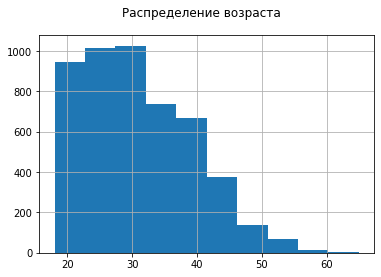

In [10]:
df['Возраст'].hist()
pl.suptitle("Распределение возраста")
pl.show()

Возраст приведем в int

In [11]:
df['Возраст'] = df['Возраст'].astype(int)

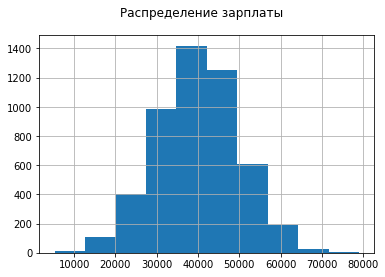

In [12]:
df['Зарплата'].hist()
pl.suptitle("Распределение зарплаты")
pl.show()

In [13]:
df['Зарплата'].unique()

array([49600., 38000., 21000., 41700., 26100., 41000., 39700., 38600.,
       49700., 51700., 36600., 29300., 39500., 55000., 43700., 23300.,
       48900., 33200., 36900., 43500., 36100., 26600., 48700., 40400.,
       38400., 34600., 34800., 36800., 42200., 46300., 30300., 51000.,
       28100., 64800., 30400., 45300., 38300., 49500., 19400., 40200.,
       31700., 69200., 33100., 31600., 34500., 38700., 39600., 42400.,
       34900., 30500., 24200., 49900., 14300., 47000., 44800., 43800.,
       42700., 35400., 57200., 29600., 37400., 48100., 33700., 61800.,
       39400., 15600., 52600., 37600., 52500., 32700., 51600., 60900.,
       41800., 47400., 26500., 45900., 35700., 34300., 26700., 25700.,
       33300., 31100., 31500., 42100., 37300., 42500., 27300., 46800.,
       33500., 44300., 41600., 53900., 40100., 44600., 45000., 32000.,
       38200., 33000., 38500., 51800., 33800., 46400., 43200., 31800.,
       50200., 35100., 30700., 45800., 49300., 42800., 33600., 50300.,
      

Также отправляем в int, ввиду отсутствия дробных значений

In [14]:
df['Зарплата'] = df['Зарплата'].astype(int)

In [15]:
df['Члены семьи'].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

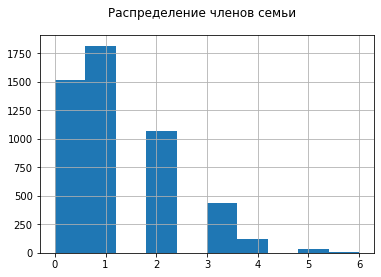

In [16]:
df['Члены семьи'].hist()
pl.suptitle("Распределение членов семьи")
pl.show()

In [17]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

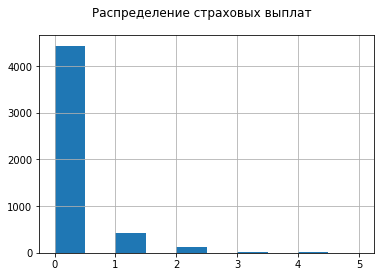

In [18]:
df['Страховые выплаты'].hist()
pl.suptitle("Распределение страховых выплат")
pl.show()

#### Вывод

Распределение данных выглядит адекватно, никаких вычурных значений на замечено. Два признака были приведены к целочисленному типу данных, т.к. в их значениях не было дробной части

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** нет, при умножении признаков на обратимую матрицу, качество модели не снизится

**Обоснование:**

$X^TX$ - квадратная обратимая матрица

$AA^{-1} = A^{-1}A = E$

$a1 = XP(XP)^{-1}((XP^T)^{-1}(XP)^Ty$

$a1 = XPP^{-1}X^{-1}((XP)^T)^{-1}(XP)^Ty$

$a1 = XEX^{-1}((XP)^T)^{-1}(XP)^Ty$

$a1 = XX^{-1}(P^TX^T)^{-1}P^TX^Ty$

$a1 = XX^{-1}(XT)^{-1}(P^T)^{-1}P^TX^Ty$

$a1 = XX^{-1}(X^T)EX^Ty$

$a1 = X(X^TX)^{-1}X^Ty$

$a1 = a$

## Алгоритм преобразования

**Алгоритм**

- Подготовить признаки и целевой
- Подготовить обратимую матрицу
- Рассчитать r2_score на исходной модели
- Матрицу признаков умножить на обратимую
- Рассчитать r2_score на новой модели
- Сделать выводы

**Обоснование**

Исходя из формулы, при умножении на обратимую матрицу, результаты не изменятся. После расчета можно будет сделать выводы о влиянии на качество модели

## Проверка алгоритма

In [19]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Позаимствуем класс модели из тренажера

In [20]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = X.T.dot(X)
        w = np.linalg.inv(w)
        w = w.dot(X.T)
        w = w.dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Сгенерируем случайную матрицу

In [21]:
new_matrix = np.random.normal(size=(4,4))
new_matrix

array([[ 2.02831682, -0.17243753, -0.57533894,  0.98331   ],
       [ 0.66527341, -0.52848462,  0.01083872, -1.87959912],
       [ 0.68485698, -0.84881328,  0.06595601,  0.97225163],
       [ 0.90024985, -0.98862895,  1.49580793,  0.78199017]])

Создаем обратимую

In [22]:
new_matrix = linalg.inv(new_matrix)
new_matrix

array([[ 0.50158314,  0.12887936, -0.42772313,  0.21085216],
       [ 0.45837679, -0.34948751, -1.33025481,  0.23749594],
       [-0.02428179, -0.10531757, -0.73595758,  0.6924098 ],
       [ 0.04851123, -0.38875456,  0.21839207,  0.01184626]])

In [23]:
model = LinearRegression()

model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550308169177


In [24]:
new_features = features @ new_matrix

model.fit(new_features, target)
predictions = model.predict(new_features)
print(r2_score(target, predictions))

0.42494550308170076


Результат r2_score модели линейной регрессии изменился крайне незначительно, что говорит о корректности работы алгоритма преобразования